<a href="https://colab.research.google.com/github/ahana2611/categorizing-images-of-clothing-with-CNNs/blob/main/clothing_categorization_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch, torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(root=image_path, train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root=image_path, train=False, download=True, transform=transform)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 204kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.79MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.1MB/s]


In [ ]:
print(train_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [ ]:
print(test_dataset)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
torch.manual_seed(42)
train_dl = DataLoader(train_dataset, batch_size, shuffle = True)

In [ ]:
data_iter = iter(train_dl)
images, labels = next(data_iter)
print(labels)

tensor([5, 7, 4, 7, 3, 8, 9, 5, 3, 1, 2, 3, 2, 3, 3, 7, 9, 9, 3, 2, 4, 6, 3, 5,
        5, 3, 2, 0, 0, 8, 4, 2, 8, 5, 9, 2, 4, 9, 4, 4, 3, 4, 9, 7, 2, 0, 4, 5,
        4, 8, 2, 6, 7, 0, 2, 0, 6, 3, 3, 5, 6, 0, 0, 8])


In [ ]:
class_names = ['T-shirt/top','Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt', ' Sneaker','Bag', 'Ankle Boot']

In [ ]:
print(images[0].shape)
print(torch.max(images), torch.min(images))

torch.Size([1, 28, 28])
tensor(1.) tensor(0.)


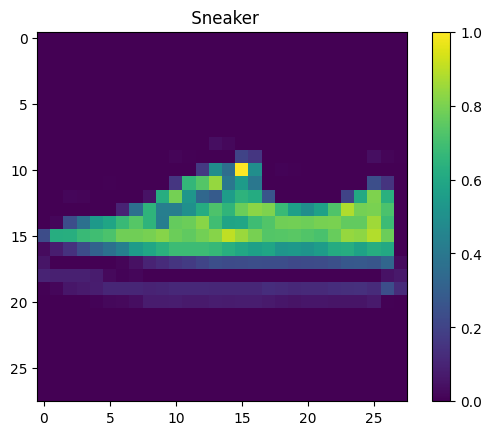

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
npimg = images[1].numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.colorbar()
plt.title(class_names[labels[1]])
plt.show()

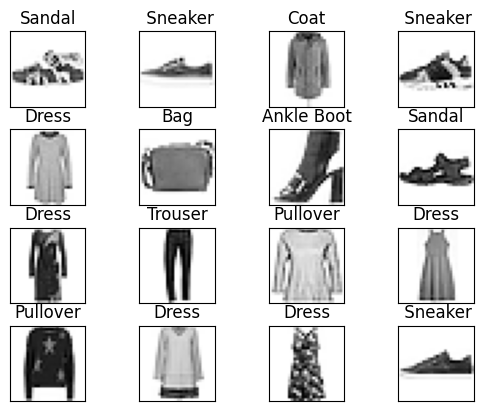

In [ ]:
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.subplots_adjust(hspace=.3)
  plt.xticks([])
  plt.yticks([])
  npimg = images[i].numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)),cmap="Greys")
  plt.title(class_names[labels[i]])
plt.show()

In [ ]:
import torch.nn as nn
model = nn.Sequential()

In [ ]:
model.add_module('conv1',
                 nn.Conv2d(in_channels = 1,
                           out_channels = 32,
                           kernel_size = 3)
                 )
model.add_module('relu1',nn.ReLU())

In [ ]:
model.add_module('pool1',nn.MaxPool2d(kernel_size=2))

In [ ]:
model.add_module('conv2',
                 nn.Conv2d(in_channels = 32,
                           out_channels = 64,
                           kernel_size = 3)
                 )
model.add_module('relu2',nn.ReLU())

In [ ]:
model.add_module('pool2',nn.MaxPool2d(kernel_size=2))

In [ ]:
model.add_module('conv3',
                 nn.Conv2d(in_channels = 64,
                           out_channels = 128,
                           kernel_size = 3)
                 )
model.add_module('relu3',nn.ReLU())

In [ ]:
x = torch.rand((64, 1, 28, 28))
print(model(x).shape)


torch.Size([64, 128, 3, 3])


In [ ]:
model.add_module('flatten',nn.Flatten())

In [ ]:
print(model(x).shape)

torch.Size([64, 1152])


In [ ]:
model.add_module('fc1', nn.Linear(1152, 64))
model.add_module('relu4', nn.ReLU())

In [ ]:
model.add_module('fc2', nn.Linear(64, 10))
model.add_module('output', nn.Softmax(dim =1))

In [ ]:
print(model)

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1152, out_features=64, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (output): Softmax(dim=1)
)


In [ ]:

from torchsummary import summary
summary(model, input_size=(1, 28, 28), batch_size =-1, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7            [-1, 128, 3, 3]          73,856
              ReLU-8            [-1, 128, 3, 3]               0
           Flatten-9                 [-1, 1152]               0
           Linear-10                   [-1, 64]          73,792
             ReLU-11                   [-1, 64]               0
           Linear-12                   [-1, 10]             650
          Softmax-13                   [-1, 10]               0
Total params: 167,114
Trainable params:

In [ ]:
device = torch.device("cuda:0")
model = model.to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train(model, optimizer, num_epochs, train_dl):
  for epoch in range(num_epochs):
    loss_train = 0
    accuracy_train = 0
    for x_batch, y_batch in train_dl:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      pred = model(x_batch)
      loss = loss_fn(pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_train += loss.item() * y_batch.size(0)
      is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
      accuracy_train += is_correct.sum().cpu()
    loss_train /= len(train_dl.dataset)
    accuracy_train /= len(train_dl.dataset)

    print(f'Epoch {epoch+1} - loss: {loss_train:.4f} - accuracy: {accuracy_train:.4f}')


In [ ]:
num_epochs = 30
train(model, optimizer, num_epochs, train_dl)

Epoch 1 - loss: 1.7263 - accuracy: 0.7380
Epoch 2 - loss: 1.6540 - accuracy: 0.8082
Epoch 3 - loss: 1.6377 - accuracy: 0.8244
Epoch 4 - loss: 1.6165 - accuracy: 0.8446
Epoch 5 - loss: 1.5921 - accuracy: 0.8694
Epoch 6 - loss: 1.5812 - accuracy: 0.8801
Epoch 7 - loss: 1.5735 - accuracy: 0.8877
Epoch 8 - loss: 1.5654 - accuracy: 0.8959
Epoch 9 - loss: 1.5628 - accuracy: 0.8986
Epoch 10 - loss: 1.5577 - accuracy: 0.9036
Epoch 11 - loss: 1.5553 - accuracy: 0.9058
Epoch 12 - loss: 1.5532 - accuracy: 0.9078
Epoch 13 - loss: 1.5494 - accuracy: 0.9114
Epoch 14 - loss: 1.5477 - accuracy: 0.9137
Epoch 15 - loss: 1.5446 - accuracy: 0.9168
Epoch 16 - loss: 1.5430 - accuracy: 0.9182
Epoch 17 - loss: 1.5403 - accuracy: 0.9211
Epoch 18 - loss: 1.5383 - accuracy: 0.9229
Epoch 19 - loss: 1.5381 - accuracy: 0.9230
Epoch 20 - loss: 1.5363 - accuracy: 0.9248
Epoch 21 - loss: 1.5360 - accuracy: 0.9250
Epoch 22 - loss: 1.5339 - accuracy: 0.9274
Epoch 23 - loss: 1.5334 - accuracy: 0.9274
Epoch 24 - loss: 1.5

In [ ]:
test_dl = DataLoader(test_dataset, batch_size=64, shuffle=False)
def evaluate_model(model, test_dl):
  accuracy_test = 0
  with torch.no_grad():
    for x_batch, y_batch in test_dl:
      pred = model.cpu()(x_batch)
      is_correct = torch.argmax(pred, dim=1) == y_batch
      accuracy_test += is_correct.float().sum().item()
  print(f'Accuracy on test set: {100 * accuracy_test / 10000}%')
evaluate_model(model,test_dl)

Accuracy on test set: 77.88%


In [ ]:
conv3_weight = model.conv3.weight.data
print(conv3_weight.shape)

torch.Size([128, 64, 3, 3])


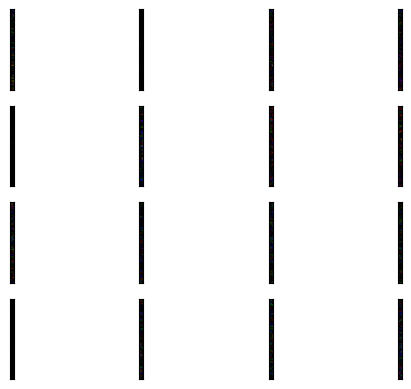

In [ ]:
n_filters = 16
for i in range(n_filters):
  weight = conv3_weight[i].cpu().numpy()
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(weight, cmap='gray')
plt.show()


In [ ]:
image = images[1]
img_flipped = transforms.functional.hflip(image)

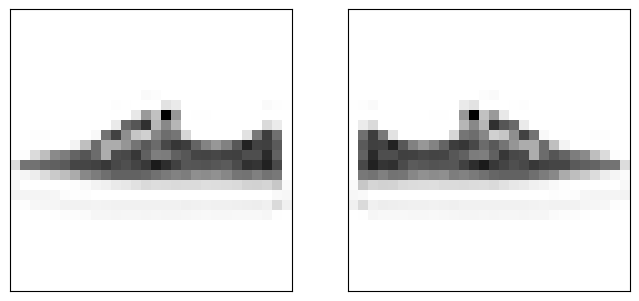

In [ ]:
def display_image_greys(image):
  npimg = image.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)),cmap = "Greys")
  plt.xticks([])
  plt.yticks([])

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
display_image_greys(image)
plt.subplot(1, 2, 2)
display_image_greys(img_flipped)
plt.show()

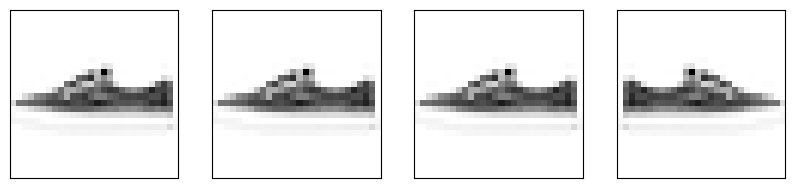

In [ ]:
torch.manual_seed(42)
flip_transform = transforms.Compose([transforms.RandomHorizontalFlip()])
plt.figure(figsize=(10,10))
plt.subplot(1, 4, 1)
display_image_greys(image)
for i in range(3):
  plt.subplot(1, 4, i+2)
  img_flip = flip_transform(image)
  display_image_greys(img_flip)

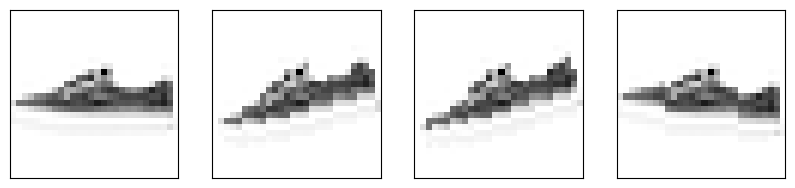

In [ ]:
torch.manual_seed(42)
rotate_transform = transforms.Compose([transforms.RandomRotation(degrees=20)])
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
display_image_greys(image)
for i in range(3):
  plt.subplot(1, 4, i+2)
  img_rotate = rotate_transform(image)
  display_image_greys(img_rotate)

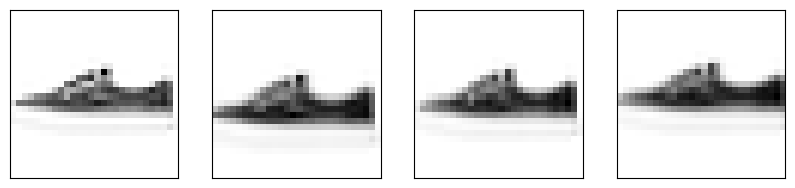

In [ ]:
torch.manual_seed(42)
crop_transform  =transforms.Compose([transforms.RandomResizedCrop(size=(28,28), scale=(0.7,1))])
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
display_image_greys(image)
for i in range(3):
  plt.subplot(1, 4, i+2)
  img_crop = crop_transform(image)
  display_image_greys(img_crop)

In [ ]:
torch.manual_seed(42)
transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.RandomResizedCrop(size=(28, 28), scale=(0.9, 1)),transforms.ToTensor(),])

In [ ]:
train_dataset_aug = torchvision.datasets.FashionMNIST(root =image_path,train=True, transform=transform_train, download=False)
from torch.utils.data import Subset
train_dataset_aug_small = Subset(train_dataset_aug, torch.arange(500))


In [ ]:
train_dl_aug_small = DataLoader(train_dataset_aug_small, batch_size=64, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, stride=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(32, 64, kernel_size=3, stride=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(64, 128, kernel_size=3, stride=1),
    nn.ReLU(),

    nn.Flatten(),

    nn.Linear(1152, 64),  # Adjust 1152 if needed (match flattened feature size)
    nn.ReLU(),

    nn.Linear(64, 10)
)

model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
train(model, optimizer, 1000, train_dl_aug_small)


Epoch 1 - loss: 2.2795 - accuracy: 0.1540
Epoch 2 - loss: 2.0321 - accuracy: 0.3180
Epoch 3 - loss: 1.5874 - accuracy: 0.4400
Epoch 4 - loss: 1.4407 - accuracy: 0.4500
Epoch 5 - loss: 1.2935 - accuracy: 0.4980
Epoch 6 - loss: 1.2298 - accuracy: 0.5700
Epoch 7 - loss: 1.1128 - accuracy: 0.6120
Epoch 8 - loss: 1.0601 - accuracy: 0.6120
Epoch 9 - loss: 0.9972 - accuracy: 0.6500
Epoch 10 - loss: 0.9529 - accuracy: 0.6680
Epoch 11 - loss: 0.8991 - accuracy: 0.6880
Epoch 12 - loss: 0.8688 - accuracy: 0.6920
Epoch 13 - loss: 0.8692 - accuracy: 0.6860
Epoch 14 - loss: 0.8009 - accuracy: 0.7100
Epoch 15 - loss: 0.7599 - accuracy: 0.7060
Epoch 16 - loss: 0.7619 - accuracy: 0.7140
Epoch 17 - loss: 0.7583 - accuracy: 0.7020
Epoch 18 - loss: 0.7108 - accuracy: 0.7280
Epoch 19 - loss: 0.6991 - accuracy: 0.7500
Epoch 20 - loss: 0.7122 - accuracy: 0.7320
Epoch 21 - loss: 0.6994 - accuracy: 0.7500
Epoch 22 - loss: 0.6881 - accuracy: 0.7440
Epoch 23 - loss: 0.6542 - accuracy: 0.7520
Epoch 24 - loss: 0.6

In [ ]:
evaluate_model(model, test_dl)

Accuracy on test set: 77.88%


In [ ]:
from torchvision.models import resnet18
my_resnet = resnet18(weights='IMAGENET1K_V1')

In [ ]:
my_resnet.conv1 = nn.Conv2d(1, 64, kernel_size = 7, stride = 2, padding = 3, bias = False)

In [ ]:
num_ftrs = my_resnet.fc.in_features
my_resnet.fc = nn.Linear(num_ftrs, 10)

In [ ]:
my_resnet = my_resnet.to(device)
optimizer = torch.optim.Adam(my_resnet.parameters(), lr=0.001)
train(my_resnet, optimizer, 10, train_dl)

Epoch 1 - loss: 0.4881 - accuracy: 0.8271
Epoch 2 - loss: 0.3504 - accuracy: 0.8751
Epoch 3 - loss: 0.2864 - accuracy: 0.8951
Epoch 4 - loss: 0.2645 - accuracy: 0.9041
Epoch 5 - loss: 0.2538 - accuracy: 0.9093
Epoch 6 - loss: 0.2181 - accuracy: 0.9210
Epoch 7 - loss: 0.1952 - accuracy: 0.9284
Epoch 8 - loss: 0.1763 - accuracy: 0.9342
Epoch 9 - loss: 0.1597 - accuracy: 0.9405
Epoch 10 - loss: 0.1421 - accuracy: 0.9470


In [ ]:
evaluate_model(my_resnet, test_dl)


Accuracy on test set: 90.94%
